In [35]:
#Libraries
from matplotlib import pyplot
from numpy import savez_compressed, asarray, load
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import load
from numpy import expand_dims
from PIL import Image
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import joblib
import cv2
import pickle

# Load models
path_to_model = "facenet_keras.h5"
model = load_model(path_to_model) #facenet
model_clf = load_model('nn_clf.h5') #Classifier

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [36]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
#	print(len(results))
	# extract the bounding box from each face
	faces_array = []
	for i in range(len(results)):
		x1, y1, width, height = results[i]['box']
		# bug fix
		x1, y1 = abs(x1), abs(y1)
		x2, y2 = x1 + width, y1 + height
		# extract the face
		face = pixels[y1:y2, x1:x2]
		# resize pixels to the model size
		image = Image.fromarray(face)
		image = image.resize(required_size)
		face_array = asarray(image)
		faces_array.append(face_array)
#	print(asarray(faces_array))
	return asarray(faces_array)

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0] 

with open ('labels_dataset.txt', 'rb') as fp:
    itemlist2 = pickle.load(fp)
with open ('labels_code_dataset.txt', 'rb') as fp:
    itemlist3 = pickle.load(fp)

def draw_function(figure, result_list):
	# draw the box
	draw = ax.add_patch(figure)
	return draw

boxes = []
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	a = 0
	b = 0
#	# draw the box
#	draw = ax.add_patch(rect)
	# plot each box
	for result in range(len(result_list)):
		a += 1
		print(a)
		# get coordinates
		x, y, width, height = result_list[result]['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')        
#		print(result)
		# set labes
#	for b in range(len(boxes)):
		for i in range(len(itemlist3)):
			for j in range(len(classes)):
#				if result == 0:
					if classes[j] == itemlist3[i]: 
						print(itemlist2[i])
						draw_function(rect, result_list[result])
						print('draw')
						ax.text(x, y-1, itemlist2[i], fontsize = 14,color = 'red')
					break
#				elif:
					if classes[j+1] == itemlist3[i+1]: 
						print(itemlist2[i])
						draw_function(rect, result_list[result])
						print('draw')
						ax.text(x, y-1, itemlist2[i+1], fontsize = 14,color = 'red')
					break
	pyplot.show()

In [49]:
# load image from file
path = 'Inferencias/michael_meryl.jpg'
filename = Image.open(path)
width, height = filename.size
if width >= 2000 and height >= 1270:
    newsize = (752, 478)
    filename = filename.resize(newsize)
    filename.save('Inferencias/resize.jpg')
    filename = 'Inferencias/resize.jpg'
    pixels = pyplot.imread(filename)
else:
    filename = path
    pixels = pyplot.imread(filename)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
# Extract faces in image
picture = extract_face(filename, required_size=(160, 160))

newTrainX = []

for i in range(len(picture)):
    embedding = get_embedding(model, picture[i])
    newTrainX.append(embedding)

newTrainX = asarray(newTrainX)
print(newTrainX.shape)

(3, 128)


This is: Meryl_Streep
Class number: 3
Class probability: 100.0


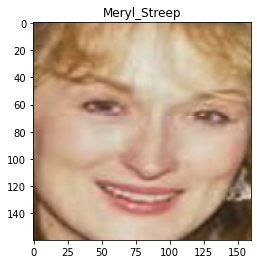

This is: Michael_Jackson
Class number: 4
Class probability: 100.0


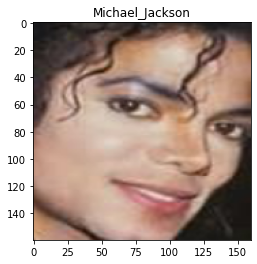

This is: Unknown
Class number: 6
Class probability: 97.63235


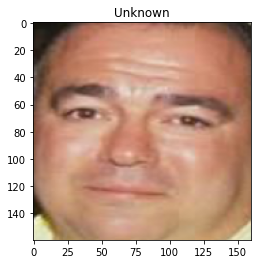

1
Meryl_Streep
draw
2
Meryl_Streep
draw
3
Meryl_Streep
draw


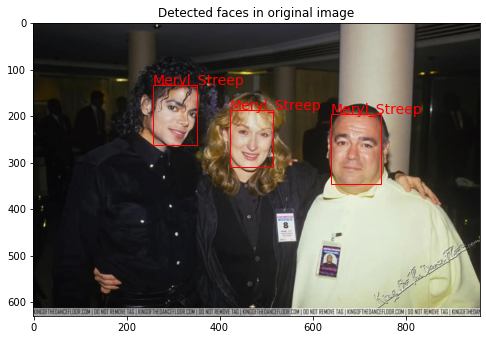

In [50]:
with open ('labels_dataset.txt', 'rb') as fp:
    itemlist2 = pickle.load(fp)

with open ('labels_code_dataset.txt', 'rb') as fp:
    itemlist3 = pickle.load(fp)

# prediction for the face
classes = []
class_prob = []
for i in range(len(newTrainX)):
    face_emb = np.reshape(newTrainX[i], (1, 128))
    #print(face_emb.shape)
    yhat_class = model_clf.predict_classes(face_emb)
    yhat_prob = model_clf.predict_proba(face_emb)
    class_prob.append(yhat_prob)

    # get name
    class_index = yhat_class[0]
    classes.append(class_index)
    #print(class_index)
    class_probability = yhat_prob[0, class_index] * 100
    class_prob.append(yhat_prob)
    #print(class_probability)
    
    for l in range(len(itemlist3)):
        if class_index == itemlist3[l]:
            print('This is:' + ' ' + str(itemlist2[l]))
            title_2 = (itemlist2[l])
            
    pyplot.title(title_2)
    pyplot.imshow(picture[i])
    
    print('Class number:' + ' ' + str(class_index))
    print('Class probability:' + ' ' + str(round(class_probability, 5)))
    pyplot.show()
    
#plot for fun
f, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6)) 
title = ('Detected faces in original image')
pyplot.title(title)
draw_image_with_boxes(filename, faces) 